In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Bulk insertion

## Gathering statistics of some manually measured execution times

In [2]:
def get_mean_std(execution_time_minutes : list) -> tuple:
    return np.mean(execution_time_minutes), np.std(execution_time_minutes)

### SIFT100M (in-memory)

In [3]:
sift100m_im_mean, sift100m_im_std = get_mean_std([111.387, 105.869])
print(
    f"SIFT100M execution time: {int(sift100m_im_mean)} +/- {int(sift100m_im_std)} minutes")


SIFT100M execution time: 108 +/- 2 minutes


### SIFT1B (memory-mapped)

In [4]:
sift1b_mm_mean, sift1b_mm_std = get_mean_std([1781.18, 1602.82])
print(f"SIFT1B execution time: {int(sift1b_mm_mean)} +/- {int(sift1b_mm_std)} minutes")


SIFT1B execution time: 1692 +/- 89 minutes


## Collecting measurements

In [5]:
dataset_sizes = [10**6, 10**7, 10**8, 10**9]
mean_execution_time_minutes_in_memory = [1.01849, 10.6334, sift100m_im_mean]
std_execution_time_minutes_in_memory = [2.0942 / 60, 4.55587 / 60, sift100m_im_std]
mean_execution_time_minutes_memory_mapped = [1.49576, 13.3068, 144.007, sift1b_mm_mean]
std_execution_time_minutes_memory_mapped = [7.71382 / 60, 13.2965 / 60, 14.7468, sift1b_mm_std]

## I/O throughput

In [6]:
def get_throughput(n_entries, execution_time_minutes):
    vector_bytes = 128 * 4
    vector_id_bytes = 8
    list_id_bytes = 8
    data_per_entry_bytes = vector_bytes + vector_id_bytes + list_id_bytes
    total_data_read_written_bytes = n_entries * data_per_entry_bytes
    total_data_mb = total_data_read_written_bytes // 10 ** 6
    throughput = total_data_mb / (execution_time_minutes * 60)
    return throughput


### In-memory

In [7]:
for dataset_size, mean in zip(dataset_sizes, mean_execution_time_minutes_in_memory):
    mean_throughput = get_throughput(dataset_size, mean)
    print(f"Throughput for {dataset_size // 10**6}M entries: {round(mean_throughput, 1)} MB/s")
mean_throughputs_in_memory = [get_throughput(dataset_size, mean) for dataset_size, mean in zip(dataset_sizes, mean_execution_time_minutes_in_memory)]

Throughput for 1M entries: 8.6 MB/s
Throughput for 10M entries: 8.3 MB/s
Throughput for 100M entries: 8.1 MB/s


### Memory-mapped

In [8]:
for dataset_size, mean in zip(
    dataset_sizes, mean_execution_time_minutes_memory_mapped
):
    mean_throughput = get_throughput(dataset_size, mean)
    print(f"Throughput for {dataset_size // 10**6}M entries: {round(mean_throughput, 1)} MB/s")
mean_throughputs_memory_mapped = [get_throughput(dataset_size, mean) for dataset_size, mean in zip(dataset_sizes, mean_execution_time_minutes_memory_mapped)]

Throughput for 1M entries: 5.9 MB/s
Throughput for 10M entries: 6.6 MB/s
Throughput for 100M entries: 6.1 MB/s
Throughput for 1000M entries: 5.2 MB/s


### Plotting I/O throughput

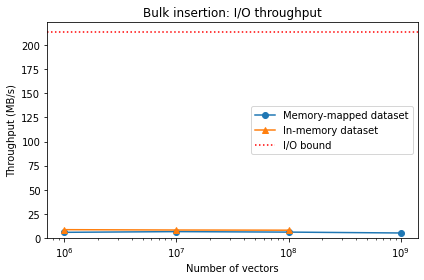

In [17]:
plt.subplots(tight_layout=True)
plt.plot(
    dataset_sizes,
    mean_throughputs_memory_mapped,
    label="Memory-mapped dataset",
    marker="o",
)
plt.plot(
    dataset_sizes[:-1],
    mean_throughputs_in_memory,
    label="In-memory dataset",
    marker="^",
)
plt.title('Bulk insertion: I/O throughput')
plt.xscale("log")
plt.xlabel("Number of vectors")
plt.ylabel("Throughput (MB/s)")
plt.axhline(y=213.1, color="r", linestyle="dotted", label="I/O bound")
plt.ylim(bottom=0)
plt.legend()
plt.savefig('bulk-insertion-io-throughput.jpg', dpi=300)
plt.show()


## Overhead of memory mapping

In [18]:

overhead = np.array(mean_execution_time_minutes_memory_mapped[:-1]) / np.array(mean_execution_time_minutes_in_memory)
mean = np.mean(overhead)
std = np.std(overhead)
print(f"Overhead of Memory Mapping: {round(mean, 2)} +/- {round(std, 2)}")

Overhead of Memory Mapping: 1.35 +/- 0.09


## Plotting bulk insertion execution time vs #vectors inserted

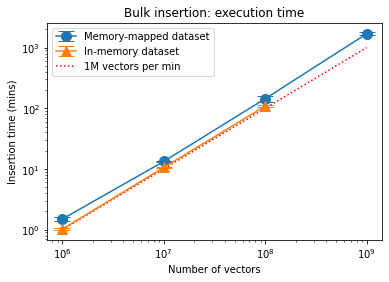

In [19]:
mm_bar = plt.errorbar(dataset_sizes, mean_execution_time_minutes_memory_mapped, yerr=std_execution_time_minutes_memory_mapped, label='Memory-mapped dataset',  marker='o', markersize=10, capsize=8)
im_bar = plt.errorbar(dataset_sizes[:-1], mean_execution_time_minutes_in_memory, yerr=std_execution_time_minutes_in_memory, label='In-memory dataset', marker='^', markersize=10, capsize=8)
lin_bar = plt.plot(dataset_sizes, [x / 10**6 for x in dataset_sizes], color='red', linestyle='dotted', label='1M vectors per min')
plt.title('Bulk insertion: execution time')
plt.loglog()
plt.xlabel('Number of vectors')
plt.ylabel('Insertion time (mins)')
plt.legend(handles=[mm_bar, im_bar, lin_bar[0]])
plt.savefig('bulk-insertion-execution-time.jpg', dpi=300)
plt.show()


In [20]:
10**6 / 1.49, 10**9 / 1700

(671140.9395973154, 588235.2941176471)